In [1]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
import pandas as pd  
import numpy as np
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("D:/UCI/cancer.csv",names = ["ID","diagnose","radius","texture","perimeter","area",
                "smoothness","compactness","concavity","concave points","symmetry","fractal_dimension"])
data.drop(columns=["ID","diagnose"], inplace=True)
info = np.array(data)

In [3]:
from sklearn import preprocessing
import numpy as np
info_scaled = preprocessing.scale(info)
info_scaled 
#标准化

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00, ...,
         2.53247522e+00,  2.21751501e+00,  2.25574689e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00, ...,
         5.48144156e-01,  1.39236330e-03, -8.68652457e-01],
       [ 1.57988811e+00,  4.56186952e-01,  1.56650313e+00, ...,
         2.03723076e+00,  9.39684817e-01, -3.98007910e-01],
       ...,
       [ 7.02284249e-01,  2.04557380e+00,  6.72675785e-01, ...,
         1.05777359e-01, -8.09117071e-01, -8.95586935e-01],
       [ 1.83834103e+00,  2.33645719e+00,  1.98252415e+00, ...,
         2.65886573e+00,  2.13719425e+00,  1.04369542e+00],
       [-1.80840125e+00,  1.22179204e+00, -1.81438851e+00, ...,
        -1.26181958e+00, -8.20069901e-01, -5.61032377e-01]])

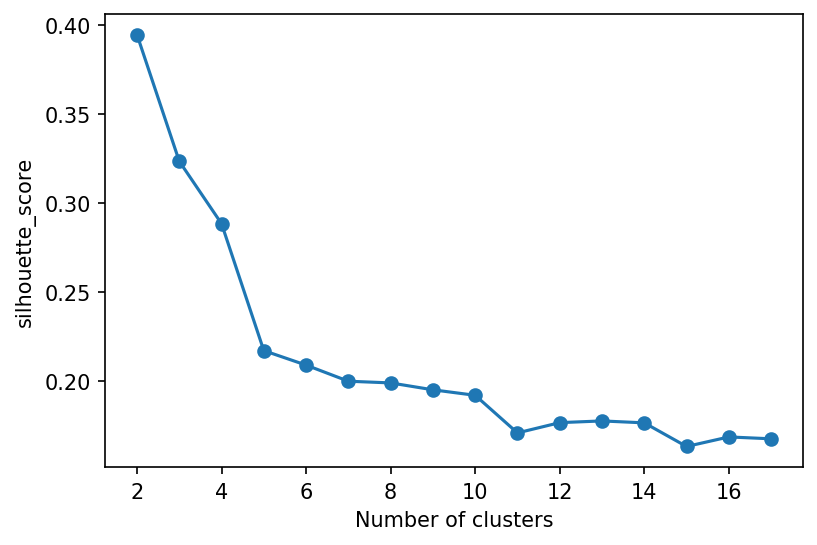

In [6]:
#轮廓系数
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X = info_scaled
scores = []
for i in range(2, 18):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    scores.append(metrics.silhouette_score(X, km.labels_ , metric='euclidean'))
plt.figure(dpi=150)
plt.plot(range(2,18), scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()